In [312]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
from PIL import Image
#from scipy.misc import imread

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Read data and plot

In [300]:
sample_n = 1000 # number of samples
r = 40  # shrink size to focus on center part

datafile = 'SwRI-D/d_800.jpg'
im0 = Image.open(datafile)
d_all = np.array(im0)
_h, _w, _ = d_all.shape
d_cut = d_all[_h//2-r:_h//2+r, _w//2-r:_w//2+r, :]
d_shape = d_cut.shape
h, w, _ = d_cut.shape
print('data shape {}'.format(d_shape))

data shape (80, 80, 3)


<IPython.core.display.Javascript object>


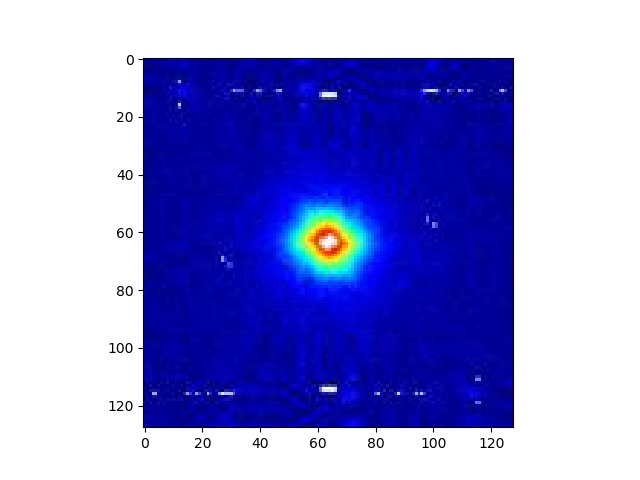

<IPython.core.display.Javascript object>


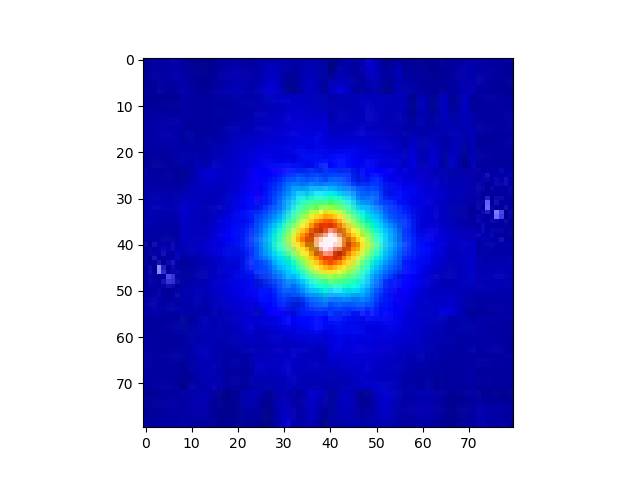

In [401]:
fig, ax = plt.subplots()
ax.imshow(im0)

# image after cut
fig, ax = plt.subplots()
ax.imshow(d_cut)

Assemble data into correct shape for analysis

In [303]:
#data0 = np.zeros([sample_n, d_shape[0]*d_shape[1]*d_shape[2]])   # save full RGB data
data = np.zeros([sample_n, d_shape[0]*d_shape[1]])              # save grey data, average in 3rd dim
data_line = np.zeros([sample_n, d_shape[1]])                   # only line data, i.e., center row
row_n = d_shape[1] // 2

for i in range(sample_n):
    fpath = 'SwRI-D/d_{}.jpg'.format(i)
    tmp = Image.open(fpath)
    d_all = np.array(tmp)
    s1, s2, _ = d_all.shape
    d = d_all[s1//2-r : s1//2+r, s2//2-r : s2//2+r, :]
    d_grey = np.mean(d, axis=2)                               # averaged RGB data
    #data0[i, :] = d.ravel()
    data[i,:] = d_grey.ravel()
    data_line[i,:] = d_grey[row_n, :]
print('data shape: {}'.format(data.shape)) 
print('data_line shape: {}'.format(data_line.shape)) 

data shape: (1000, 6400)
data_line shape: (1000, 80)


<IPython.core.display.Javascript object>


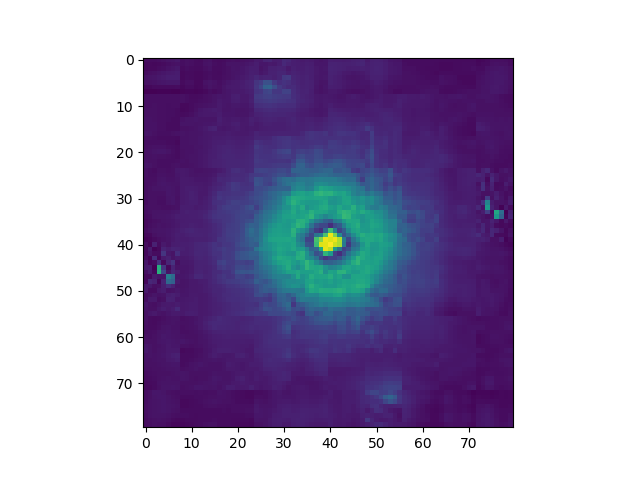

In [327]:
fig, ax = plt.subplots()
ax.imshow(data[30,:].reshape(d_shape[0],d_shape[1]))

# fig, ax = plt.subplots()   # line plot for center row
# for i in range(500,555):
#     ax.plot(data_line[i,:])

# PCA

In [288]:
# Visualize the results on PCA-reduced data

# get low dimension from PCA for plot
n_comp = 8
pca = PCA(n_components=n_comp)
reduced_data = pca.fit_transform(data)
print(pca.components_.shape, reduced_data.shape)

(8, 6400) (1000, 8)


In [289]:
# get eigen vectors
eigenfaces = pca.components_.reshape((n_comp, h, w))
eigenfaces.shape

(8, 80, 80)

<IPython.core.display.Javascript object>


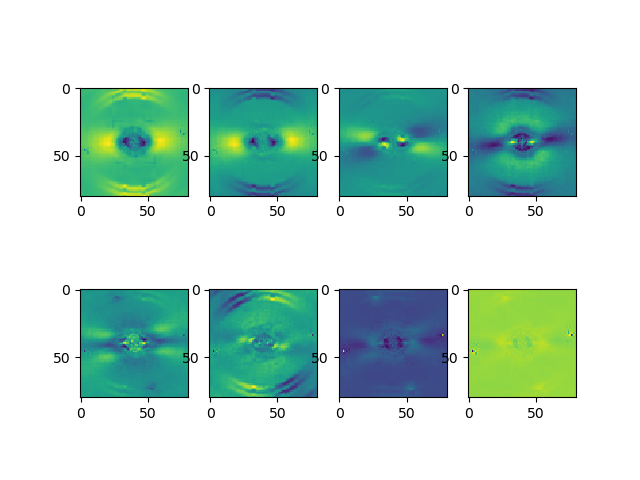

In [402]:
# egien face images
fig, axs = plt.subplots(nrows=2, ncols=4)
for i,ax in enumerate(axs.ravel()):
    im = ax.imshow(eigenfaces[i])
#plt.savefig('pca_6.jpg')

In [320]:
# fig, ax = plt.subplots()
# grid = ImageGrid(fig, 111, 
#                  nrows_ncols=(2, 4),
#                  cbar_size='7%',
#                  cbar_pad='2%')
# for i,g in enumerate(grid):
#     im = g.imshow(eigenfaces[i])
#     grid.cbar_axes[i].colorbar(im)
# fig.canvas.draw_idle()

In [291]:
pca.explained_variance_ratio_

array([ 0.61421538,  0.1189949 ,  0.06815969,  0.02942495,  0.01294305,
        0.01188478,  0.00861728,  0.00829057])

<IPython.core.display.Javascript object>


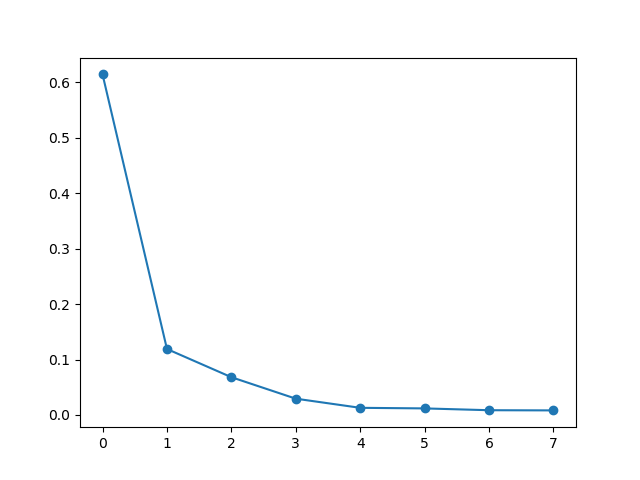

In [326]:
fig, ax = plt.subplots()
ax.plot(pca.explained_variance_ratio_, '-o')

# K means

In [398]:
#np.random.seed(42)

nclusters = 3
kmeans = KMeans(init='k-means++', n_clusters=nclusters, n_init=10)
kmeans_out = kmeans.fit_predict(data)

# K means on reduced data gives similar results
#kmeans_out = kmeans.fit_predict(reduced_data)

Project k means cluster results to different PCA components for visualization

<IPython.core.display.Javascript object>


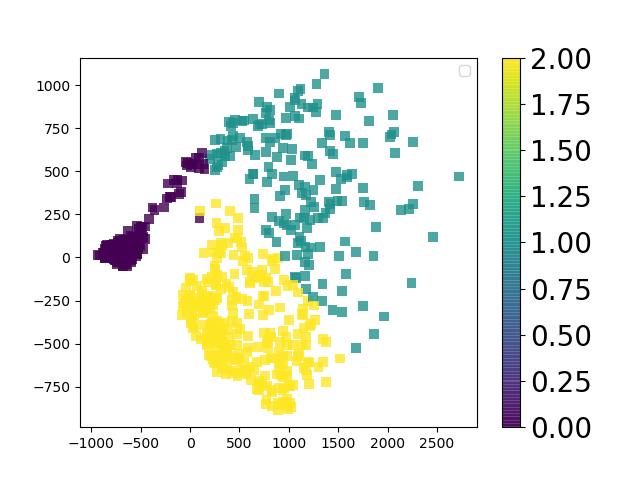

No handles with labels found to put in legend.


In [377]:
fig, ax = plt.subplots()

im = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], 
                c=kmeans_out, marker='s', s=50, alpha=0.8,
                linewidths=1, linewidth=0)
cbar = fig.colorbar(im)
cbar.ax.tick_params(labelsize=20) 

plt.legend()

<IPython.core.display.Javascript object>


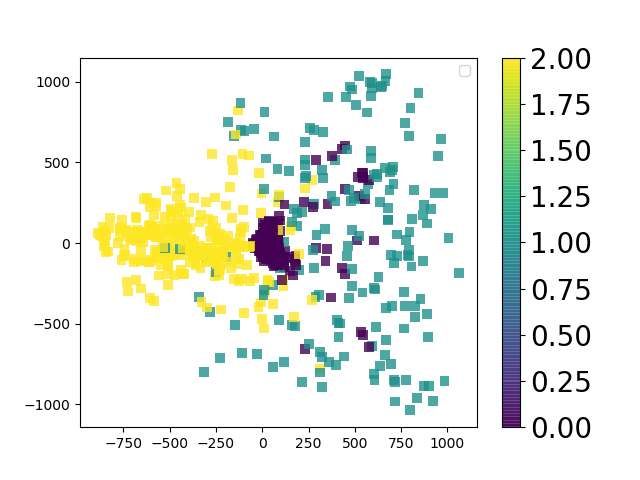

No handles with labels found to put in legend.


In [378]:
fig, ax = plt.subplots()

im = ax.scatter(reduced_data[:, 1], reduced_data[:, 2], 
                c=kmeans_out, marker='s', s=50, alpha=0.8,
                linewidths=1, linewidth=0)
cbar = fig.colorbar(im)
cbar.ax.tick_params(labelsize=20) 

plt.legend()

In [379]:
get_index = lambda x: np.where(kmeans_out==x)[0]

# Visualize images from different groups

<IPython.core.display.Javascript object>


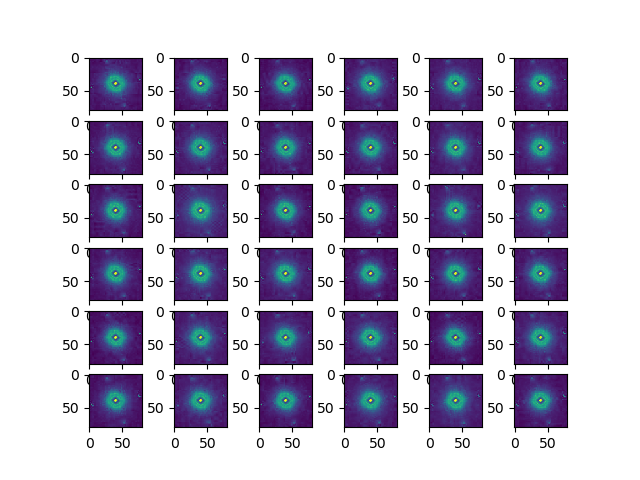

In [380]:
group_id = 0
idv = get_index(group_id)

fig, axs = plt.subplots(nrows=6, ncols=6)
for i,ax in enumerate(axs.ravel()):
    v_index = idv[i]
    ax.imshow(data[v_index,:].reshape(d_shape[0],d_shape[1]))

<IPython.core.display.Javascript object>


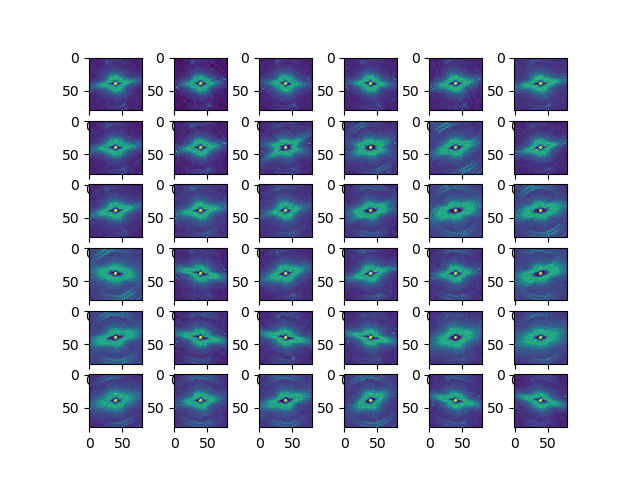

In [381]:
group_id = 1
idv = get_index(group_id)

fig, axs = plt.subplots(nrows=6, ncols=6)
for i,ax in enumerate(axs.ravel()):
    v_index = idv[i]
    ax.imshow(data[v_index,:].reshape(d_shape[0],d_shape[1]))

<IPython.core.display.Javascript object>


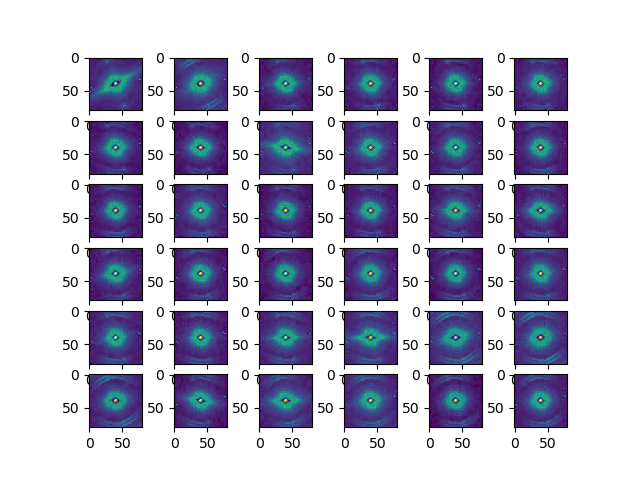

In [382]:
group_id = 2
idv = get_index(group_id)

fig, axs = plt.subplots(nrows=6, ncols=6)
for i,ax in enumerate(axs.ravel()):
    v_index = idv[i]
    ax.imshow(data[v_index,:].reshape(d_shape[0],d_shape[1]))

In [385]:
# group_id = 3
# idv = get_index(group_id)

# fig, axs = plt.subplots(nrows=6, ncols=6)
# for i,ax in enumerate(axs.ravel()):
#     v_index = idv[i]
#     ax.imshow(data[v_index,:].reshape(d_shape[0],d_shape[1]))

In [384]:
# group_id = 4
# idv = get_index(group_id)

# fig, axs = plt.subplots(nrows=6, ncols=6)
# for i,ax in enumerate(axs.ravel()):
#     v_index = idv[i]
#     ax.imshow(data[v_index,:].reshape(d_shape[0],d_shape[1]))

# Map clustering results to x,y positions

<IPython.core.display.Javascript object>


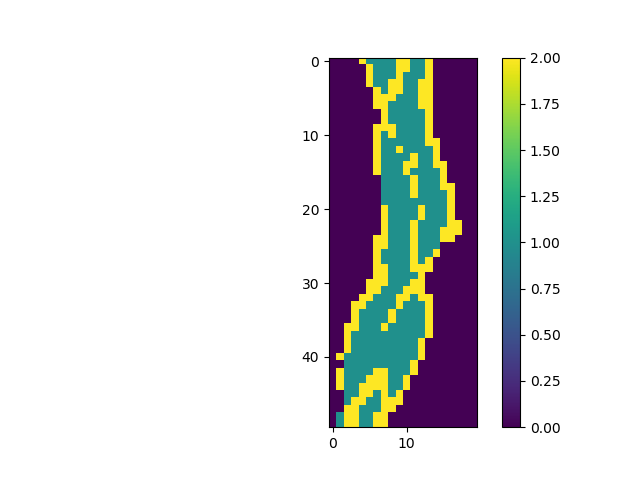

In [399]:
# image for 3 clustering groups

fig, ax = plt.subplots()
im = ax.imshow(kmeans_out.reshape([20,50]).T)
plt.colorbar(im)

<IPython.core.display.Javascript object>


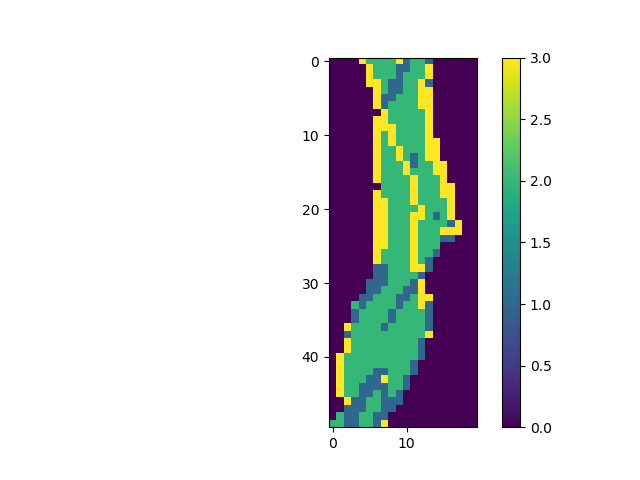

In [392]:
# image for 4 clustering groups

fig, ax = plt.subplots()
im = ax.imshow(kmeans_out.reshape([20,50]).T)
plt.colorbar(im)

<IPython.core.display.Javascript object>


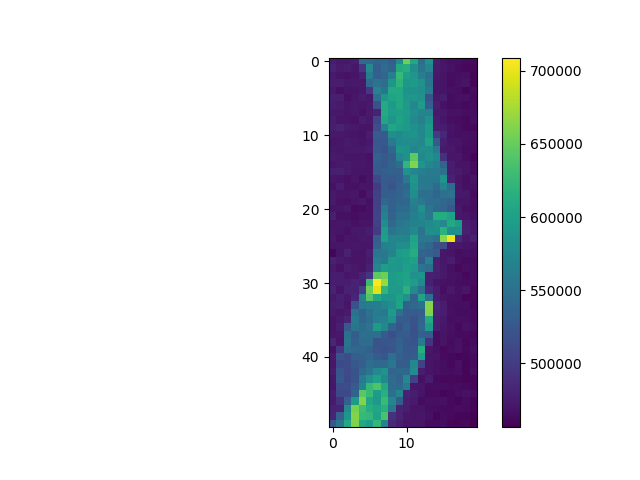

In [400]:
# image for total intensity

data_intensity = np.sum(data, axis=1)
fig, ax = plt.subplots()
im = ax.imshow(data_intensity.reshape([20,50]).T)
plt.colorbar(im)